# TAHAP 2 - MEMBANGUN MODEL MACHINE LEARNING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('.\simpandata\data_latih.csv')
df

person_age  person_income  person_home_ownership  person_emp_length  \
0              40          25000                      3                0.0   
1              30          42000                      3                2.0   
2              24          40000                      3                0.0   
3              23          85000                      0                6.0   
4              31          34000                      3                2.0   
...           ...            ...                    ...                ...   
22754          27          51000                      2               11.0   
22755          21          75000                      3                5.0   
22756          28          39750                      3                5.0   
22757          27          90000                      0                5.0   
22758          33          48000                      0                7.0   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0                5           2       7000          10.99            0   
1                3           1       7200          10.99            0   
2                4           0      10000           8.49            0   
3                1           3       9000          12.36            0   
4                3           1       2400          12.21            0   
...            ...         ...        ...            ...          ...   
22754            5           0      18000           7.49            0   
22755            3           1      15000          10.37            0   
22756            1           0       7250           8.49            0   
22757            5           2      12000          12.73            0   
22758            3           0      13800           8.90            0   

       loan_percent_income  cb_person_default_on_file  \
0                     0.28                          0   
1                     0.17                          0   
2                     0.25                          0   
3                     0.11                          1   
4                     0.07                          0   
...                    ...                        ...   
22754                 0.35                          0   
22755                 0.20                          0   
22756                 0.18                          0   
22757                 0.13                          0   
22758                 0.29                          0   

       cb_person_cred_hist_length  
0                              15  
1                               6  
2                               3  
3                               2  
4                               5  
...                           ...  
22754                           6  
22755                           4  
22756                           8  
22757                           9  
22758                           6  

[22759 rows x 12 columns]

In [3]:
# Memisahkan fitur (X/input) dan target (y/output):
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [4]:
# membagi data menjadi data latih dan data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
print(f'Ukuran feature/input Data Training: {X_train.shape}')
print(f'Ukuran Class/output Data Training: {y_train.shape}')
print(f'Ukuran feature/input Data Testing: {X_test.shape}')
print(f'Ukuran Class/output Data Testing: {y_test.shape}')

Ukuran feature/input Data Training: (15931, 11)
Ukuran Class/output Data Training: (15931,)
Ukuran feature/input Data Testing: (6828, 11)
Ukuran Class/output Data Testing: (6828,)


# Membangun Model Mesin Learning- 1 (Tanpa Feature Scalling)

In [5]:
# membangun model decision tree dengan criterion "entropy"
mesin1 = DecisionTreeClassifier(criterion='entropy')

In [6]:
# melatih model decision tree pada train set
mesin1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [7]:
# cek jumlah node dan daun pada Dtree
num_nodes = mesin1.tree_.node_count
num_leaves = mesin1.get_n_leaves()
print(f"jumlah node: {num_nodes}")
print(f"jumlah daun: {num_leaves}")

jumlah node: 2701
jumlah daun: 1351


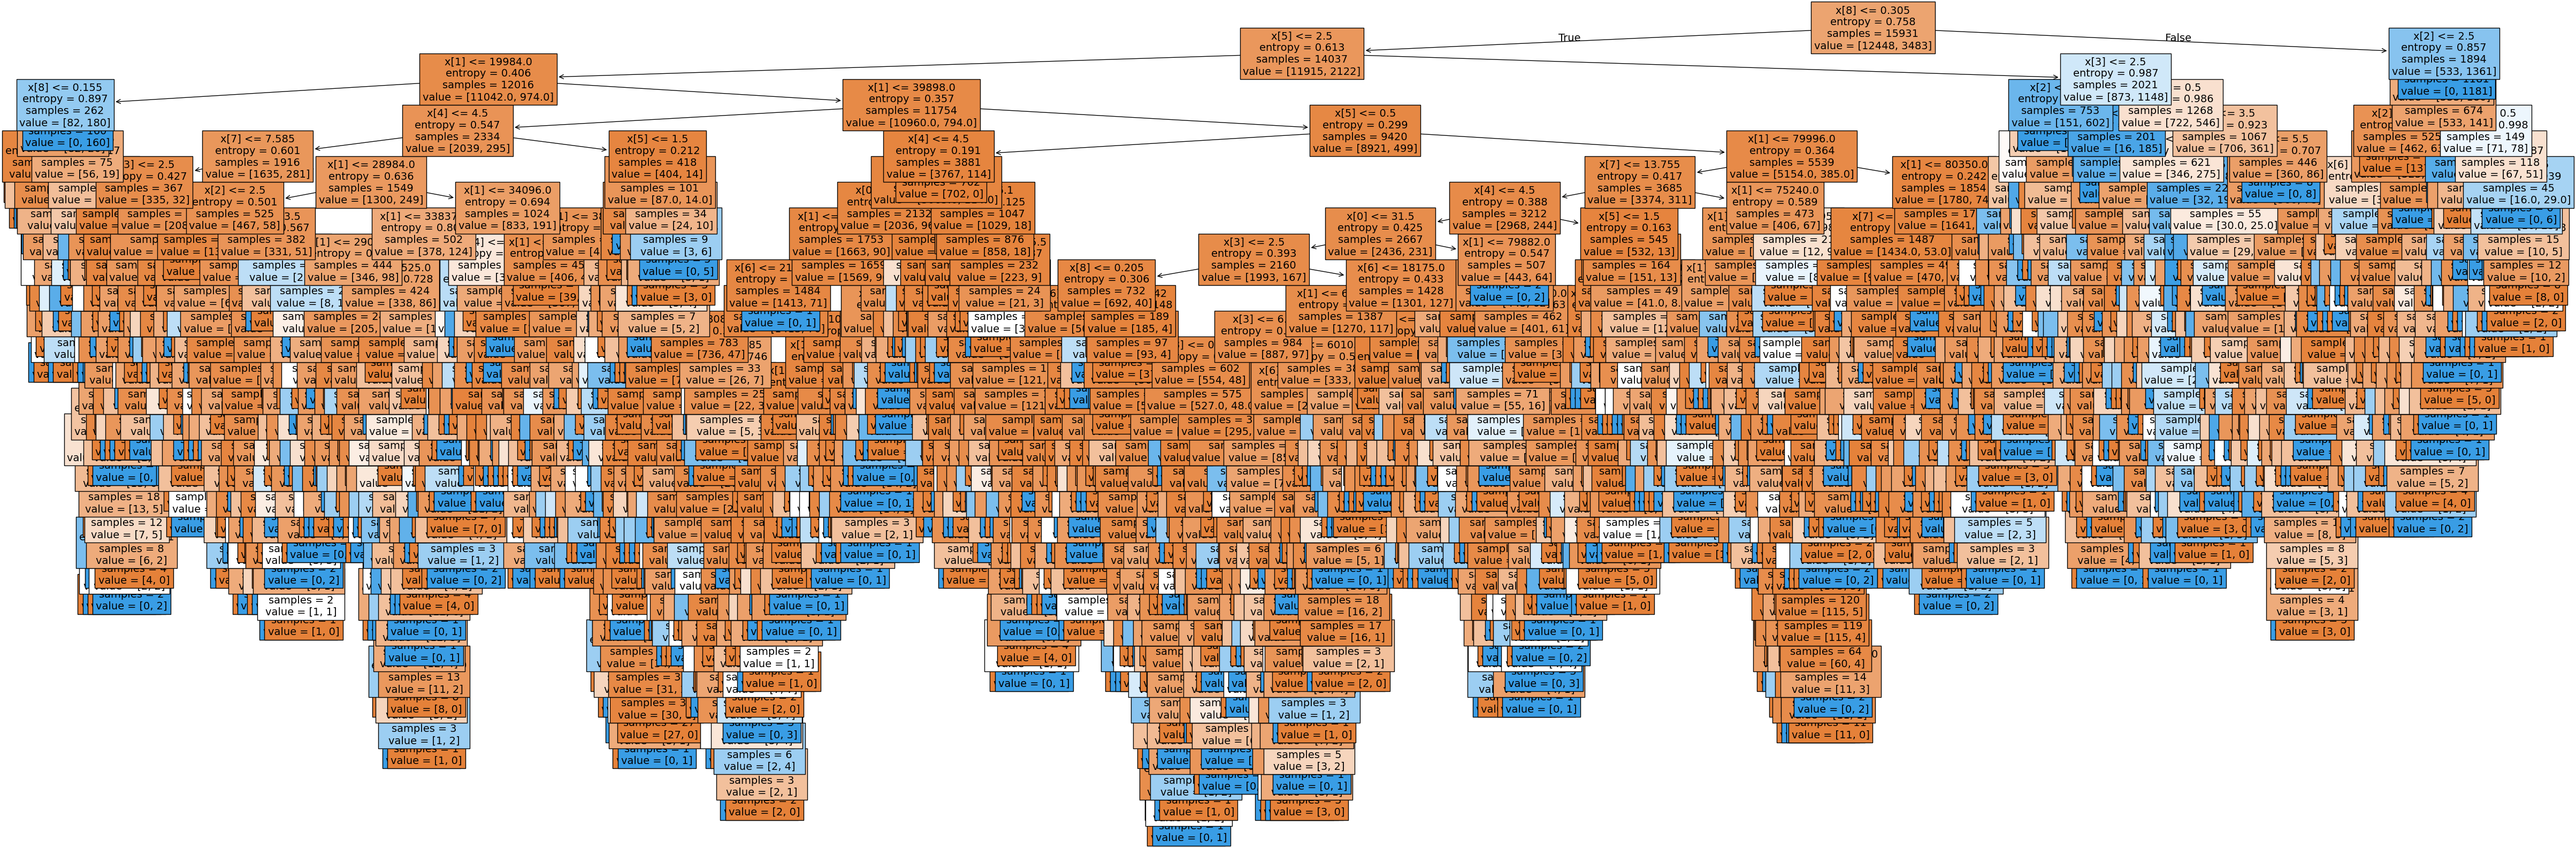

In [8]:
plt.figure(figsize=(60,20))
plot_tree(mesin1, filled=True, fontsize=14)
plt.savefig('./grafik/MesinLearning1.png')
plt.show()

In [9]:
#menampilkan hasil prediksi (Uji Model)
y_pred = mesin1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
# Menghitung jumlah prediksi yang benar dan salah  
jumlah_benar = np.sum(y_pred == y_test)  # Jumlah prediksi yang benar  
jumlah_salah = np.sum(y_pred != y_test)  # Jumlah prediksi yang salah  
total_data = len(y_test)                  # Total jumlah data yang diuji  

# Menampilkan hasil  
print(f'Total jumlah data yang diuji: {total_data}')  
print(f'Jumlah hasil prediksi yang benar: {jumlah_benar}')  
print(f'Jumlah hasil prediksi yang salah: {jumlah_salah}')

Total jumlah data yang diuji: 6828
Jumlah hasil prediksi yang benar: 6048
Jumlah hasil prediksi yang salah: 780


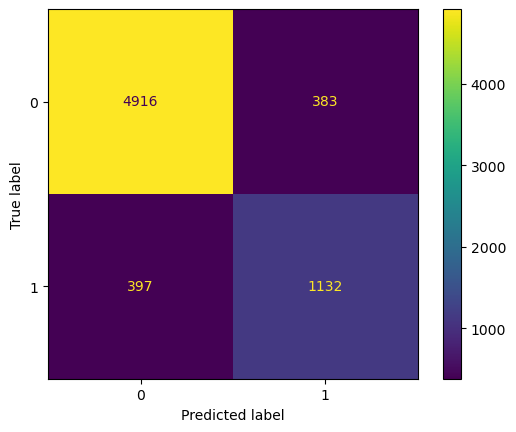

In [11]:
y_pred = mesin1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('./grafik/cM-model1.png')

## **confusion matrix**, merupakan matrik yang digunakan untuk mengevaluasi kinerja model mesin learning yang menggunakan teknik klasifikasi. 
### pada confusion matrix diatas dapat dijelaskan bahwa:
- **True Positive (TP)**: 1141
  - Jumlah prediksi positif yang benar (model memprediksi "1 = status kredit macet " dan data aktual juga "1 = status kredit macet ").
  
- **True Negative (TN)**: 4900
  - Jumlah prediksi negatif yang benar (model memprediksi "0  = status kredit lancar " dan data aktual juga "0  = status kredit lancar ").
  
- **False Positive (FP)**: 399
  - Jumlah prediksi positif yang salah (model memprediksi "1 = status kredit macet ", tetapi data aktual "0  = status kredit lancar ").
  
- **False Negative (FN)**: 388
  - Jumlah prediksi negatif yang salah (model memprediksi "0  = status kredit lancar ", tetapi data aktual "1 = status kredit macet ").


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8857644991212654


## Akurasi dari model mesin learning 1
### Akurasi cukup  tinggi (88.52%) menunjukkan bahwa model  umumnya mampu memprediksi dengan benar sebanyak 6041 data dari total 6828 data 
## Perhitungan Manual Nilai Akurasi
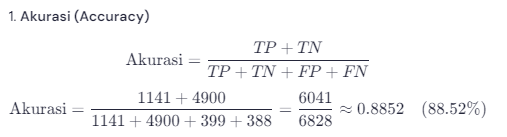

In [13]:
# menghitung precision, recall, dan f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)

# menampilkan classification report
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5299
           1       0.75      0.74      0.74      1529

    accuracy                           0.89      6828
   macro avg       0.84      0.83      0.84      6828
weighted avg       0.89      0.89      0.89      6828



# DARI NILAI MATRIKS DIATAS DIKETAHUI BAHWA:
- **Kelas Negatif (0)**: Model bekerja sangat baik dengan presisi dan recall yang tinggi, menciptakan F1-Score yang sangat baik (0.93). Ini menunjukkan keandalan tinggi dalam mengidentifikasi kasus negatif.
  
- **Kelas Positif (1)**: Model sedikit kurang efektif, dengan presisi dan recall yang lebih rendah. Nilai F1-Score yang berada di 0.74 menunjukkan bahwa ada ruang untuk perbaikan dalam mendeteksi kelas positif.

- **Akurasi Menggambarkan Kinerja Umum**: Dengan nilai akurasi 88.47%, itu menunjukkan bahwa model melakukan pekerjaan yang baik secara keseluruhan, tetapi ada perbedaan dalam kinerja antara kedua kelas.

- **Rata-rata Makro dan Tertimbang** menunjukkan bahwa meskipun kelas positif memiliki kinerja yang lebih rendah daripada kelas negatif, model masih dapat diandalkan saat diperhitungkan dalam konteks proporsional total data.

1. **Precision** (ketepatan/kemampuan model untuk memprediksi kasus dengan tepat):
   - **Kelas 0**: **0.93** (93%)
     - Dari semua prediksi yang dibuat untuk kelas negatif (0), 93% di antaranya adalah benar.
   - **Kelas 1**: **0.74** (74%)
     - Dari semua prediksi yang dibuat untuk kelas positif (1), 74% di antaranya adalah benar.

2. **Recall** (sensitifitas/kemampuan model untuk mengidentifikasi setiap kasus):
   - **Kelas 0**: **0.92** (92%)
     - Dari semua kasus sebenarnya yang merupakan kelas negatif (0), model berhasil mengidentifikasi 92% dari mereka.
   - **Kelas 1**: **0.75** (75%)
     - Dari semua kasus sebenarnya yang merupakan kelas positif (1), model berhasil mengidentifikasi 75% dari mereka.

3. **F1-Score**:
   - **Kelas 0**: **0.93** (93%)
     - Merupakan rata-rata harmonis dari presisi dan recall untuk kelas negatif, menunjukkan keseimbangan yang baik dalam mendeteksi kelas ini.
   - **Kelas 1**: **0.74** (74%)
     - Menunjukkan keseimbangan antara presisi dan recall untuk kelas positif. Nilai yang lebih rendah dibandingkan kelas negatif menunjukkan bahwa model lebih baik dalam mendeteksi kelas negatif.

4. **Support**:
   - **Kelas 0**: 5299
     - Jumlah kasus aktual dari kelas negatif dalam dataset.
   - **Kelas 1**: 1529
     - Jumlah kasus aktual dari kelas positif dalam dataset.

5. **Accuracy**: **0.88** (88.47%)
   - Persentase total prediksi yang benar dari seluruh dataset. Model ini menunjukkan akurasi yang baik.

6. **Macro Average**:
   - Menghitung nilai rata-rata dari presisi, recall, dan F1-Score untuk semua kelas, tanpa memperhitungkan proporsi kelas:
     - **Precision**: 0.83
     - **Recall**: 0.84
     - **F1-Score**: 0.83

7. **Weighted Average**:
   - Menghitung rata-rata dengan memperhitungkan proporsi masing-masing kelas dalam total dataset:
     - **Precision**: 0.89
     - **Recall**: 0.88
     - **F1-Score**: 0.88

# PERHITUNGAN MANUAL 
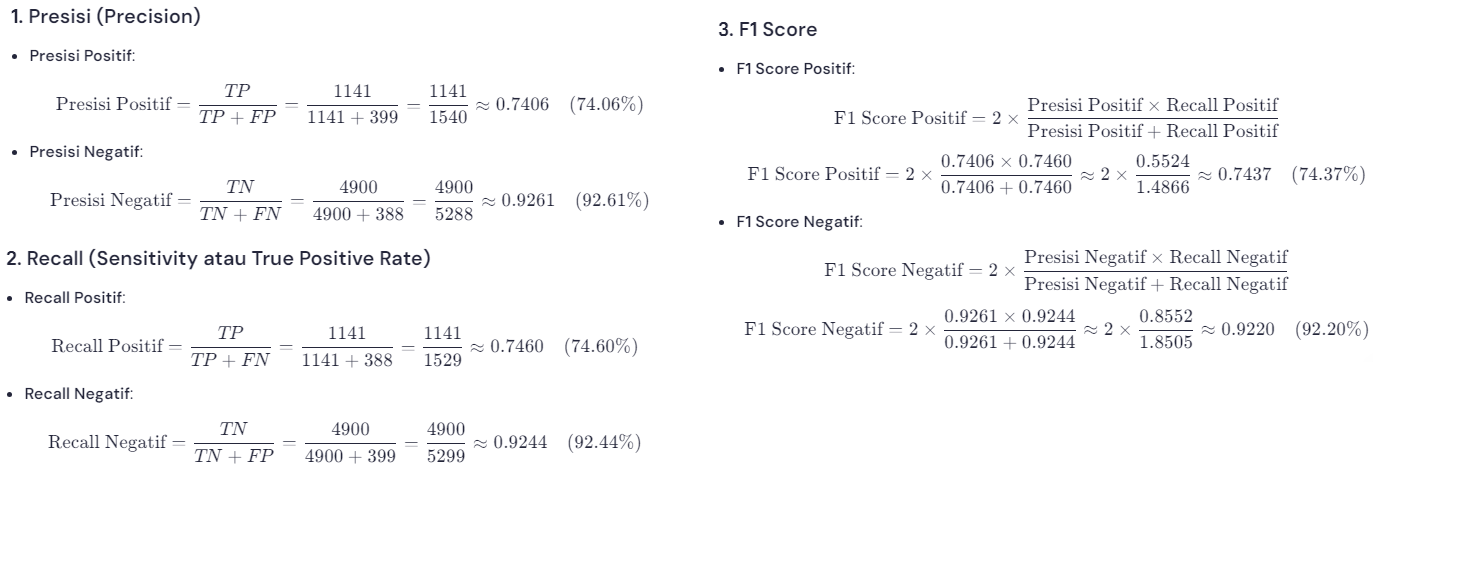

# Membangun Model Mesin Learning- 2 (Dengan Feature Scalling)

In [14]:
# ROBUST SCALLING 
from sklearn.preprocessing import RobustScaler  

# Membuat objek RobustScaler  
robust_scaler = RobustScaler()  

# Melakukan scaling pada data  
X_train1 = robust_scaler.fit_transform(X_train)
X_test1 = robust_scaler.transform(X_test)
print(X_train1)
print(X_test1)

[[ 0.28571429 -0.32        0.         ... -0.07142857  0.
   0.2       ]
 [-0.28571429 -0.56       -1.         ...  1.          1.
  -0.4       ]
 [ 0.14285714  1.36       -1.         ... -0.78571429  0.
   0.4       ]
 ...
 [ 0.14285714  1.28666667  0.         ...  0.64285714  0.
   1.2       ]
 [-0.14285714 -0.77333333  0.         ...  1.14285714  1.
  -0.2       ]
 [-0.42857143  0.53333333  0.         ... -0.28571429  0.
  -0.2       ]]
[[ 0.14285714 -0.24728    -1.         ... -0.92857143  0.
   0.2       ]
 [ 1.42857143 -0.61333333 -0.33333333 ... -0.28571429  1.
   1.4       ]
 [-0.42857143 -0.50666667  0.         ... -0.57142857  0.
   0.        ]
 ...
 [-0.28571429  1.86666667  0.         ... -0.92857143  1.
  -0.2       ]
 [ 0.42857143 -0.61333333  0.         ...  0.92857143  0.
   0.8       ]
 [ 0.          0.8        -1.         ...  0.64285714  0.
  -0.4       ]]


In [15]:
import joblib  
joblib.dump(robust_scaler, './model/robust_scaler.joblib')

['./model/robust_scaler.joblib']

In [16]:
# membangun model decision tree dengan criterion "entropy"
mesin2 = DecisionTreeClassifier(criterion='gini',
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=2)

In [17]:
# melatih model decision tree pada train set
mesin2.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [18]:
# cek jumlah node dan daun pada Dtree
num_nodes = mesin2.tree_.node_count
num_leaves = mesin2.get_n_leaves()
print(f"jumlah node: {num_nodes}")
print(f"jumlah daun: {num_leaves}")

jumlah node: 361
jumlah daun: 181


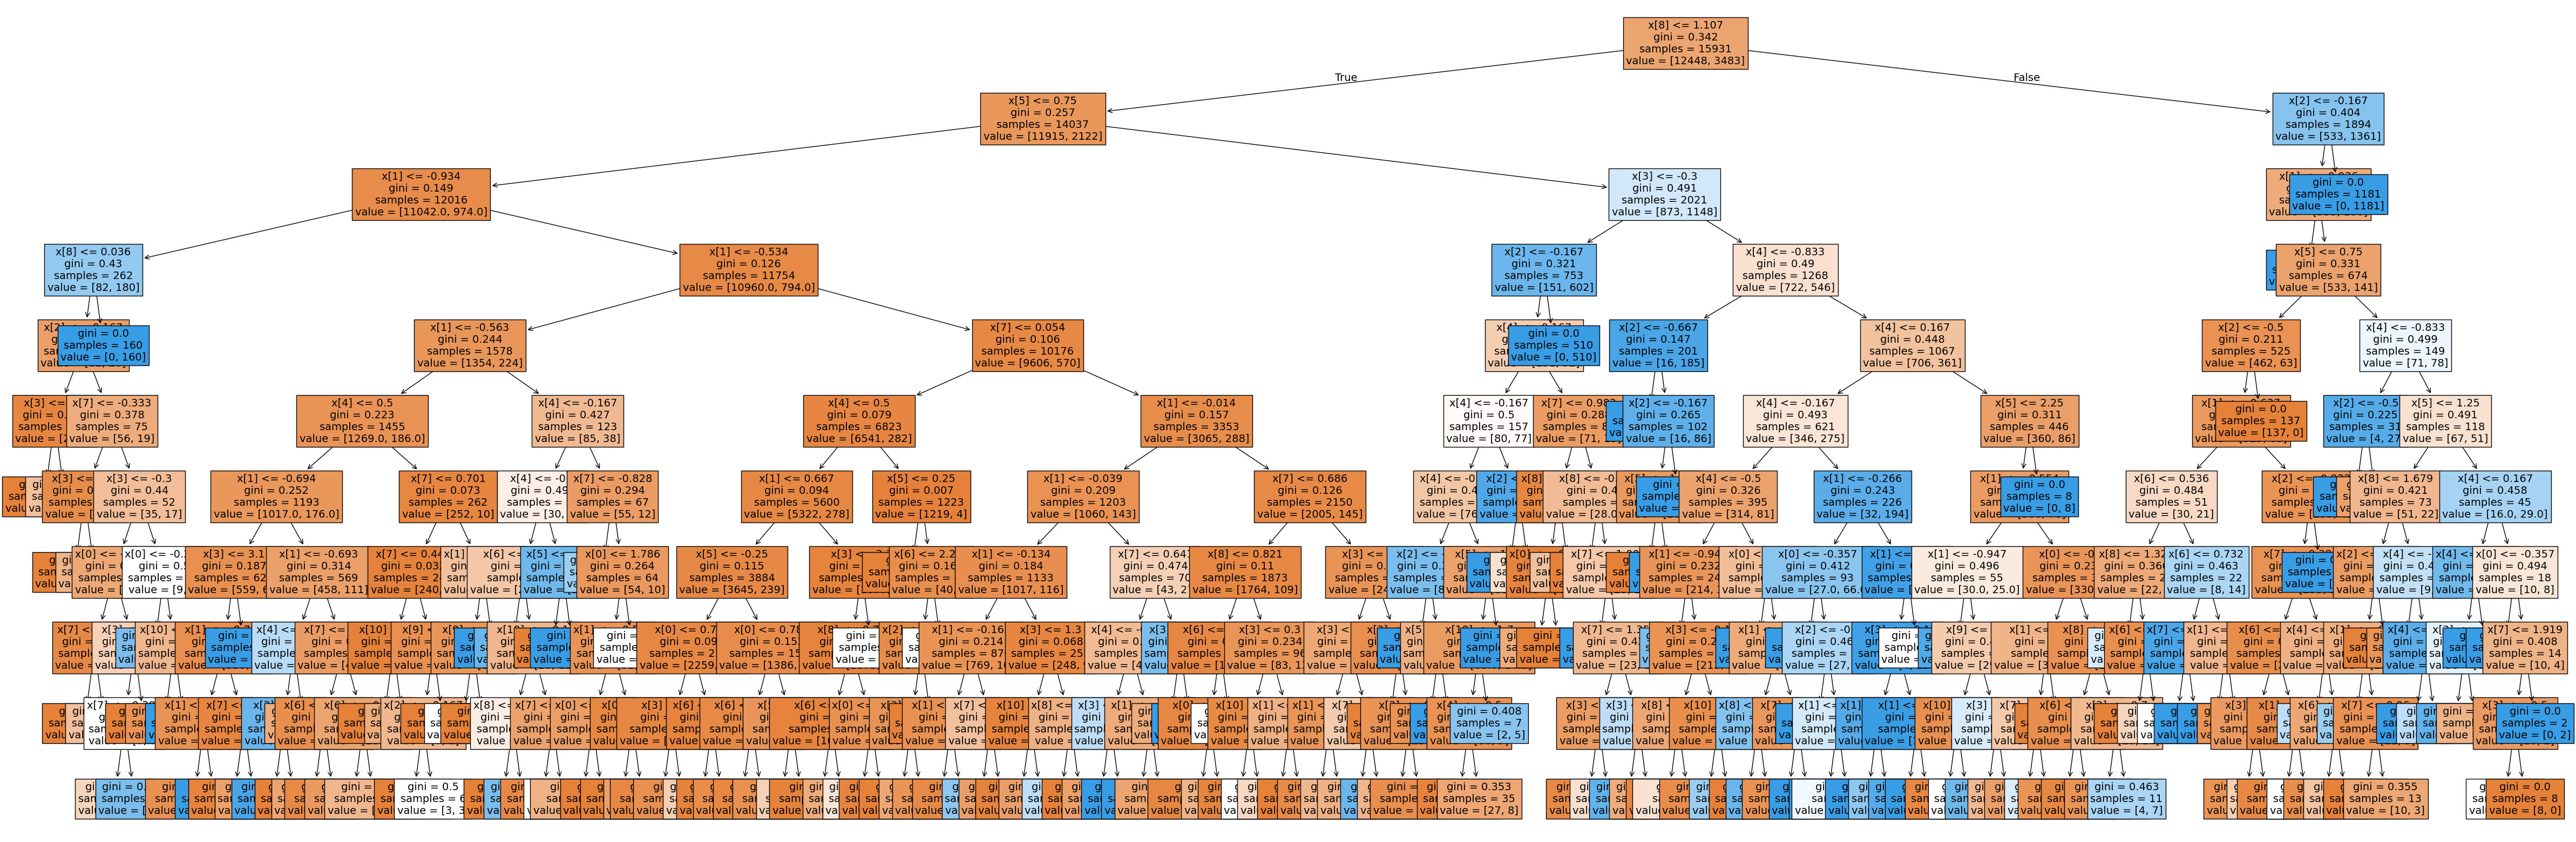

In [19]:
plt.figure(figsize=(60,20))
plot_tree(mesin2, filled=True, fontsize=14)
plt.savefig('./grafik/MesinLearning2.png')
plt.show()

In [20]:
#menampilkan hasil prediksi (Uji Model)
y_pred2 = mesin2.predict(X_test1)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# Menghitung jumlah prediksi yang benar dan salah  
jumlah_benar = np.sum(y_pred2 == y_test)  # Jumlah prediksi yang benar  
jumlah_salah = np.sum(y_pred2 != y_test)  # Jumlah prediksi yang salah  
total_data = len(y_test)                  # Total jumlah data yang diuji  

# Menampilkan hasil  
print(f'Total jumlah data yang diuji: {total_data}')  
print(f'Jumlah hasil prediksi yang benar: {jumlah_benar}')  
print(f'Jumlah hasil prediksi yang salah: {jumlah_salah}')

Total jumlah data yang diuji: 6828
Jumlah hasil prediksi yang benar: 6279
Jumlah hasil prediksi yang salah: 549


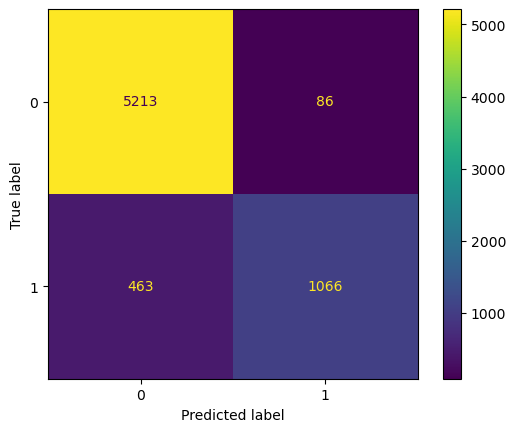

In [22]:
cm = confusion_matrix(y_test, y_pred2)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('./grafik/cM-model2.png')

# MENAMPILKAN HASIL AKURASI MODEL (R-SQUARE)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.9195957820738138


In [24]:
# menghitung precision, recall, dan f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred2, average='weighted', zero_division=1)

# menampilkan classification report
print(classification_report(y_test, y_pred2, zero_division=1))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5299
           1       0.93      0.70      0.80      1529

    accuracy                           0.92      6828
   macro avg       0.92      0.84      0.87      6828
weighted avg       0.92      0.92      0.92      6828



# MENYIMPAN MODEL MESIN LEARNING

In [25]:
#export/simpan model mesin learning dtree
import joblib

joblib.dump(mesin1,'.\model\mesin1_model.joblib')
joblib.dump(mesin2,'.\model\mesin3_model.joblib')

['.\\model\\mesin3_model.joblib']